# S04 - Exercices après le cours : Structures de données Python II et exemples logistique (solution)

## Instructions

La plupart des exercices présentés ici vous permettent de pratiquer la programmation Python de base pour certaines applications en gestion des opérations et de la logistique.

Pour chaque exercice, vous avez une cellule de code pour la réponse en dessous, où vous devez écrire votre réponse entre les lignes contenant `### commencez votre code ici ###` et `### terminez votre code ici ###`. Votre code peut contenir une ou plusieurs lignes et vous pouvez exécuter cette cellule afin de terminer l'exercice. Pour exécuter la cellule, vous pouvez taper `Shift+Enter` ou appuyer sur le bouton de lecture dans la barre d'outils ci-dessus. Vos résultats apparaîtront juste en dessous de cette cellule de réponse.

**REMARQUE :** Veuillez prêter attention au nom de la variable de sortie que vous devez fournir sous chaque question. Vous devez utiliser le même nom de variable pour la sortie afin que le résultat puisse être imprimé correctement.

## Modèle de diffusion de Bass

Dans la séance 2, nous avons défini les deux fonctions suivantes pour le modèle de diffusion de Bass :

Le nombre cumulé d'adoptants (personnes qui ont acheté/adopté le produit) $S(t)$ depuis le début (temps 0) jusqu'au temps $t$ est décrit par $S(t) = m\times F(t)$ où $m$ est la taille du marché (le nombre total estimé de clients potentiels) et $F(t)$ est la probabilité <i>cumulative</i> qu'un individu (client potentiel) ait déjà adopté le produit au temps $t$ (qui doit être calculée).
Nous pouvons obtenir $F(t)$ en fonction de $p$ et $q$ comme suit :

$$F(t) = \frac{1-e^{-(p+q)t}}{1+\frac{q}{p}e^{-(p+q)t}} $$

où
* $p$ est le coefficient d'innovation
* $q$ est le coefficient d'imitation

De plus, la probabilité d'adoption par un individu à l'instant $t$ qui est représentée par $f(t)$ (rappelons que $f(t) = \frac{d}{dt}F(t)$) peut être calculée comme suit :

$$f(t) = \frac{d}{dt}F(t) = \frac{e^{(p+q)t}p(p+q)^2}{[p e^{(p+q)t} + q]^2} \text{.}$$

Par conséquent, le nombre estimé d'adoptions dans chaque période peut être calculé comme $s(t) = m\times f(t)$

Nous avons ensuite préparé les deux fonctions suivantes pour calculer $F(t)$ et $f(t)$.

In [1]:
import math

def Bass_cumulative_probability_Ft(p, q, t):
    return (1 - math.exp(-(p + q) * t)) / (1 + (q / p) * math.exp(-(p + q) * t))

def Bass_probability_ft(p, q, t):
    return (math.exp((p + q) * t) * p * (p + q)**2) / (p * math.exp((p + q) * t) + q)**2

Sur la base des valeurs de $p$, $q$ et $m$ des ventes trimestrielles d'iPhone fournies dans la cellule de code ci-dessous, veuillez calculer les valeurs de la probabilité estimée d'adoption $f(t)$, de la probabilité cumulée d'adoption $F(t)$, du nombre d'adoptions $s(t) = m\times f(t)$ et du nombre cumulé d'adoptions $S(t) = m\times F(t)$ pour chaque trimestre, qui est indexé par $t$. Notez que la première colonne ci-dessous est un index tandis que les quatre colonnes suivantes contiennent les valeurs correspondantes des estimations basées sur le modèle de diffusion de Bass.

|Quarter| ft | Ft| st | St | 
| :- | :- | :- | :- | :- | 
|...| ... |...| ... |...|

Les paramètres $m$, $p$ et $q$ du modèle Bass pour iPhone ont été obtenus à partir de l'article ci-dessous (notez que nous verrons également comment nous pouvons obtenir de tels paramètres en utilisant une régression plus tard dans le cours).
> Ashokan, R., Zenarosa, G. L., & He, X. (2018). Modèle de diffusion pour l'adoption de marques de smartphones dans des conditions de prix concurrentiels. Int. J. Trade Econ. Finan, 9(3), 96-99.

### Question 1
Calculez les valeurs comme indiqué dans le tableau ci-dessus pour les 40 premiers trimestres de ventes (soit 10 ans) en utilisant les paramètres fournis. L'indice du trimestre doit être compris entre 0 et 39 (c'est-à-dire que le premier trimestre est considéré comme la période $t=0$).

In [2]:
m = 1884.484  # cela correspond à la valeur 1884.484×10^6, c'est-à-dire que la taille du marché est de 1,88 milliard
p = 0.001949
q = 0.117561

In [3]:
import pandas as pd

column_names = ['ft', 'Ft', 'st', 'St']
quarter_index = list(range(40))
bass_df = pd.DataFrame(index=quarter_index, columns=column_names)
bass_df.index.name = 'Quarter'

### commencez votre code ici ###
bass_df['ft'] = [Bass_probability_ft(p, q, t) for t in bass_df.index]
bass_df['Ft'] = [Bass_cumulative_probability_Ft(p, q, t) for t in bass_df.index]
bass_df['st'] = [m * bass_df.at[t, 'ft'] for t in bass_df.index]
bass_df['St'] = [m * bass_df.at[t, 'Ft'] for t in bass_df.index]
### terminez votre code ici ###

bass_df.head()

,ft,Ft,st,St
Quarter,,,,
0,0.001949,0.000000,3.672859,0.000000
1,0.002187,0.002066,4.122024,3.893282
2,0.002454,0.004384,4.623737,8.261559
3,0.002751,0.006983,5.183522,13.160108
4,0.003082,0.009897,5.807317,18.649935


### Question 2
Faire les tâches suivantes:
- (i) tracer les colonnes `['ft','Ft']` dans un graphique linéaire (paramètre `kind='line'`) et
- (ii) tracer les colonnes `['st','St']` dans un graphique à barres (paramètre `kind='bar'`).

Vous pouvez également indiquer la taille des figures en utilisant le paramètre `figsize=(12,4)`.

<Axes: xlabel='Quarter'>

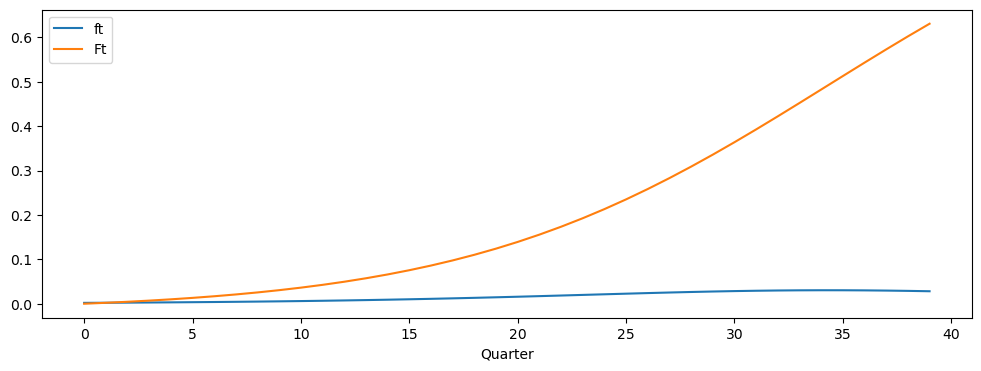

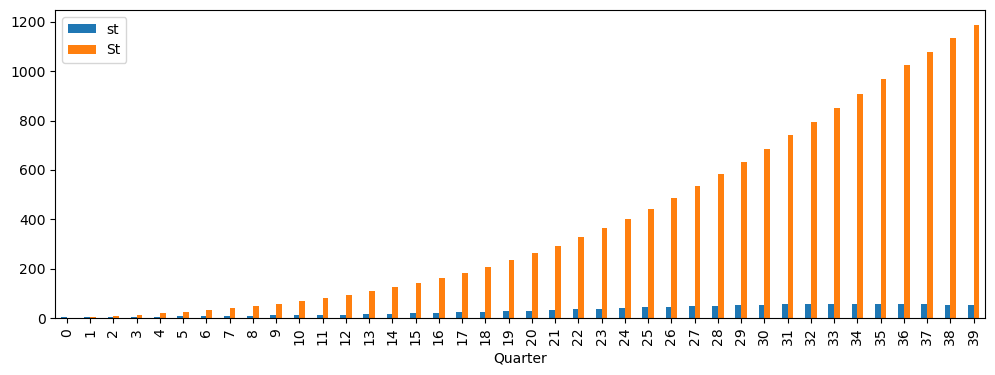

In [4]:
### commencez votre code ici ###
bass_df[['ft','Ft']].plot(figsize=(12,4))
bass_df[['st','St']].plot(kind='bar', figsize=(12,4))
### terminez votre code ici ###

### Question 3
Nous pouvons maintenant comparer les résultats avec les ventes trimestrielles réelles d'iPhone pour les 40 premiers trimestres (à partir du deuxième trimestre 2007, lorsque le produit a été lancé pour la première fois). Les données sont disponibles dans l'URL ci-dessous (au format csv) que nous pouvons télécharger dans un `DataFrame`.

In [5]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/iphone_quarter_sales.csv'
actual_sales = pd.read_csv(url, index_col='Quarter')
actual_sales.head()

,Sales
Quarter,
0,0.270
1,1.119
2,2.315
3,1.703
4,0.717


Ajoutez les colonnes suivantes et leurs valeurs correspondantes au DataFrame `bass_df`:

* Colonne `'Actual'` : qui contient les ventes réelles du DataFrame `actual_sales`
* Colonne `'CumulativeActual'` : qui calcule la somme du premier trimestre jusqu'à chaque trimestre de l'index
* Colonne `'PError'` : qui calcule le pourcentage d'erreur de chaque trimestre correspondant à partir de la colonne `'Actual'` et de la colonne `st` (ventes estimées pour chaque trimestre), c'est-à-dire `PError = (Actual - st) / Actual`

In [6]:
### commencez votre code ici ###
bass_df['Actual'] = actual_sales['Sales']
bass_df['CumulativeActual'] = [sum(actual_sales.loc[:t,'Sales']) for t in actual_sales['Sales'].index]
bass_df['PError'] = (bass_df['Actual'] - bass_df['st']) / bass_df['Actual']
### terminez votre code ici ###
bass_df

,ft,Ft,st,St,Actual,CumulativeActual,PError
Quarter,,,,,,,
0,0.001949,0.000000,3.672859,0.000000,0.270,0.270,-12.603183
1,0.002187,0.002066,4.122024,3.893282,1.119,1.389,-2.683667
2,0.002454,0.004384,4.623737,8.261559,2.315,3.704,-0.997295
3,0.002751,0.006983,5.183522,13.160108,1.703,5.407,-2.043759
4,0.003082,0.009897,5.807317,18.649935,0.717,6.124,-7.099466
5,0.003450,0.013159,6.501465,24.798189,6.892,13.016,0.056665
6,0.003859,0.016810,7.272676,31.678548,4.363,17.379,-0.666898
7,0.004313,0.020892,8.127983,39.371570,3.793,21.172,-1.142890
8,0.004815,0.025453,9.074663,47.964971,5.208,26.380,-0.742447


### Question 4
Nous pouvons également générer la date du dernier jour de chaque trimestre en utilisant le code ci-dessous.

In [7]:
quarter_index_date = pd.date_range('4/1/2007', periods=40, freq='Q')
quarter_index_date

DatetimeIndex(['2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31',
               '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31',
               '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31',
               '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31',
               '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31',
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

Veuillez (i) remplacer les index d'origine en utilisant la liste nouvellement créée `quarter_index_date` et (ii) créer ensuite les tracés suivants à partir du DataFrame `bass_df` en utilisant la taille `figsize=(12,4)` :

* Colonnes `['St','CumulativeActual']` utilisant un tracé linéaire
* Colonnes `['st','Actual']` utilisant un tracé linéaire
* Colonne `['PError']` utilisant un graphique à barres

**Astuce** : vous pouvez utiliser la méthode `set_index()` en appelant `bass_df = bass_df.set_index(new_index_list)` pour définir l'index (voir [ce lien](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html))

<Axes: xlabel='Quarter'>

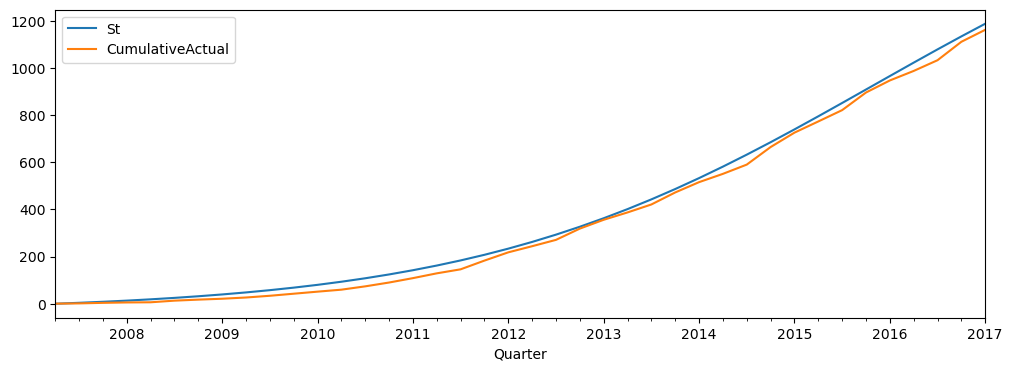

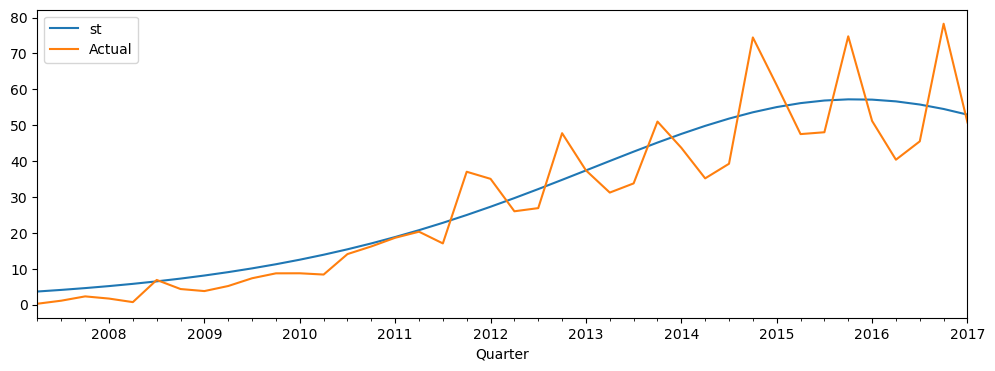

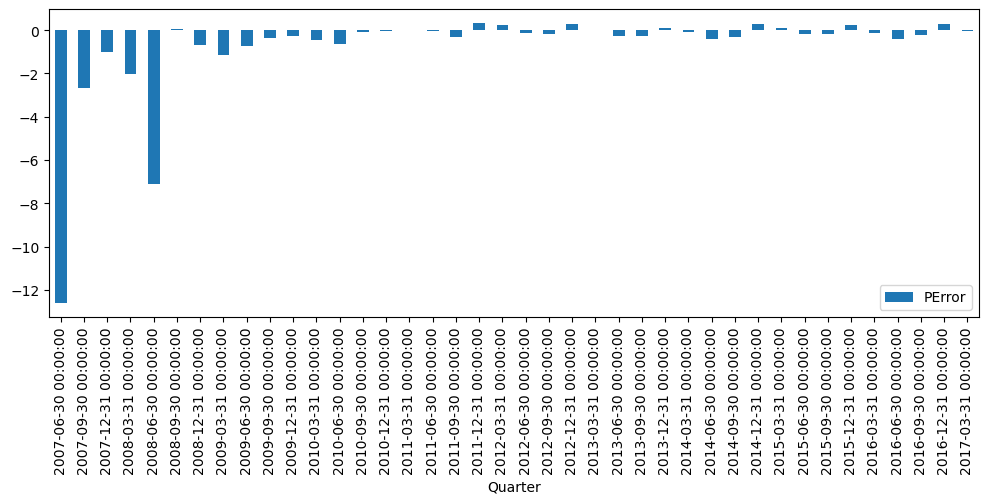

In [8]:
### commencez votre code ici ###
bass_df = bass_df.set_index(quarter_index_date)
bass_df.index.name = "Quarter"
bass_df[['St', 'CumulativeActual']].plot(figsize=(12, 4))
bass_df[['st', 'Actual']].plot(figsize=(12, 4))
bass_df[['PError']].plot(kind='bar', figsize=(12, 4))
### terminez votre code ici ###